In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
data = []
with open("Weibull.csv", "r") as file:
    for line in file:
        data.append(float(line.strip()))

size = len(data)

tStep = 0.001
minValue = 10**-320

Сначала посчитаем плотность и функцию правдоподобия, получим:

$p(x) = \gamma x^{\gamma-1} e^{-x^{\gamma}} I(x \ge 0)$

$f_\gamma(x_1,...,x_n) = \prod \limits_{k=1}^{n}\gamma x_k^{\gamma-1}e^{-x_k^{\gamma}}I(x_k \ge 0)$

Из выражения для $f_{\gamma}$ видно, что если хоть одно значение выборки меньше нуля, правдоподобие равно нулю. Поэтому для начала проверим, что таких значений в выборке нет.

In [3]:
print(min(data)) # 0.0

0.0


С учетом вышесказанного, можно считать, что

$f_\gamma(x_1,...,x_n) = \prod \limits_{k=1}^{n}\gamma x_k^{\gamma-1}e^{-x_k^{\gamma}}$

Далее считаем логарифмическую функцию правдоподобия (по основанию 10):

$L_\gamma(x_1,...x_n) = n\lg{\gamma}+(\gamma-1)\sum\limits_{k=1}^{n}\lg{x_k}-\sum\limits_{k=1}^{n}x_k^{\gamma}$

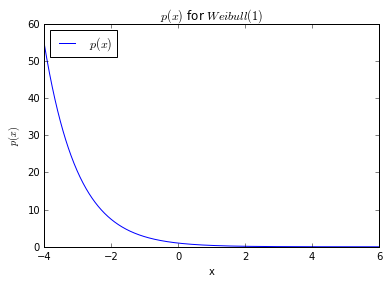

In [4]:
gamma = 1
def p(x):
    return gamma * pow(x, gamma - 1) * np.exp(-pow(x, gamma))
xp = np.linspace(gamma - 5, gamma + 5, 10**3)

myFigure, myAxis = plt.subplots()
myAxis.plot(xp, [p(x) for x in xp], label=r"$p(x)$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("x")
myAxis.set_ylabel(r"$p(x)$")
myAxis.set_title(r"$p(x)$ for $Weibull({})$".format(gamma))

In [5]:
# Для нулей, которые в файле все равно приходится писать костыль.

def L(gamma, values = data):
    return (
        math.log10(gamma) * len(values) +
        sum([(gamma - 1) * math.log10(max(value, minValue)) - pow(max(value, minValue), gamma) for value in values])       
    )

In [6]:
# Первые 4 года
days = 365 * 4 + 1

tMin, tMax = -2, 2

maximum = L(pow(10, tMin), data[:days])
result1 = tMin
for t in np.arange(start=tMin, stop=tMax, step=tStep):
    temp = L(pow(10, t), data[:days])
    if temp > maximum:
        maximum = temp
        result1 = t
print(pow(10, result1))

0.350751873952


При оценке по первым 4 годам получили оценку параметра $\gamma=0.351$

In [7]:
# Вся выборка

maximum = L(pow(10, tMin))
result2 = tMin
for t in np.arange(start=tMin, stop=tMax, step=tStep):
    temp = L(pow(10, t))
    if temp > maximum:
        maximum = temp
        result2 = t
print(pow(10, result2))

0.264850013861


А при оценке по всех выборке, $\gamma = 0.265$

Расхождения в результатах приличные. Вероятно это связано с большим различием данных в первые 4 года и все последующие года. Возможно в банке произошли значительные перемиены.